In [1]:
# Importación de librerías 
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#  Clase de Red Neuronal 
class RedNeuronal:
    def __init__(self, input_size, hidden_size=128):
        """Inicializa la red neuronal con:
        - Capa de entrada: input_size neuronas (600x800 = 480,000)
        - Capa oculta: hidden_size neuronas
        - Capa de salida: 1 neurona"""
        
        # Inicialización de pesos 
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2./input_size)
        self.W2 = np.random.randn(hidden_size, 1) * np.sqrt(2./hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, 1))
        
        # Para guardar el historial
        self.loss_history = []
        self.acc_history = []
    
    def sigmoid(self, x):
        """Función de activación sigmoide"""
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        """Propagación hacia adelante"""
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.maximum(0, self.z1)  # ReLU
        self.output = self.sigmoid(np.dot(self.a1, self.W2) + self.b2)
        return self.output
    
    def train(self, X, y, epochs=100, lr=0.001):
        """Entrenamiento con backpropagation"""
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Cálculo de error
            error = output - y.reshape(-1, 1)
            loss = np.mean(error**2)
            
            # Backpropagation
            d_output = error * (output * (1 - output))
            d_hidden = np.dot(d_output, self.W2.T) * (self.a1 > 0)  # Gradiente ReLU
            
            # Actualización de pesos
            self.W2 -= lr * np.dot(self.a1.T, d_output)
            self.b2 -= lr * np.sum(d_output, axis=0)
            self.W1 -= lr * np.dot(X.T, d_hidden)
            self.b1 -= lr * np.sum(d_hidden, axis=0)
            
            # Calcular precisión
            accuracy = np.mean((output > 0.5) == y.reshape(-1, 1))
            
            # Guardar historial
            self.loss_history.append(loss)
            self.acc_history.append(accuracy)
            
            if epoch % 10 == 0:
                print(f"Época {epoch}: Loss={loss:.4f}, Accuracy={accuracy*100:.1f}%")
                
            # Early stopping si no mejora
            if epoch > 20 and np.mean(self.acc_history[-5:]) < 0.6:
                print("Deteniendo entrenamiento por baja precisión")
                break

In [5]:
# Función para cargar imágenes
def cargar_imagenes(carpeta, etiqueta, target_size=(800, 600)):
    """Carga imágenes y las redimensiona a 800x600 (ancho x alto)"""
    imagenes = []
    etiquetas = []
    
    print(f"\nCargando imágenes de {carpeta}...")
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = cv2.imread(os.path.join(carpeta, archivo), cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"  No se pudo leer: {archivo}")
                continue
                
            # Redimensión y preprocesamiento
            img = cv2.resize(img, target_size)
            
            # Mejorar contraste 
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            img = clahe.apply(img)
            
            # Normalización
            img = (img - img.mean()) / (img.std() + 1e-8)
            
            imagenes.append(img.flatten())
            etiquetas.append(etiqueta)
    
    print(f" {len(imagenes)} imágenes cargadas (todas {target_size[0]}x{target_size[1]})")
    return np.array(imagenes), np.array(etiquetas)

In [7]:
#  Carga de datos
print("=== INICIO DEL PROGRAMA ===")
print("Todas las imágenes se redimensionarán a 800x600 píxeles")

carpeta_tu = "dataset/mi_rostro"
carpeta_otros = "dataset/otros_rostros"

X_yo, y_yo = cargar_imagenes(carpeta_tu, 1)
X_otros, y_otros = cargar_imagenes(carpeta_otros, 0)

# Verificar balance de clases
print("\n Balance de clases:")
print(f"- Mis fotos: {len(y_yo)} imágenes")
print(f"- Otros: {len(y_otros)} imágenes")

if len(y_yo) == 0 or len(y_otros) == 0:
    raise ValueError("Debemos tener imágenes en ambas carpetas")

# Combinar y mezclar datos
X = np.vstack((X_yo, X_otros))
y = np.hstack((y_yo, y_otros))
indices = np.random.permutation(len(X))
X, y = X[indices], y[indices]

=== INICIO DEL PROGRAMA ===
Todas las imágenes se redimensionarán a 800x600 píxeles

Cargando imágenes de dataset/mi_rostro...
 32 imágenes cargadas (todas 800x600)

Cargando imágenes de dataset/otros_rostros...
 31 imágenes cargadas (todas 800x600)

 Balance de clases:
- Mis fotos: 32 imágenes
- Otros: 31 imágenes



=== ENTRENAMIENTO ===
Época 0: Loss=0.3751, Accuracy=39.7%
Época 10: Loss=0.0712, Accuracy=92.1%
Época 20: Loss=0.0476, Accuracy=95.2%
Época 30: Loss=0.0476, Accuracy=95.2%
Época 40: Loss=0.0476, Accuracy=95.2%
Época 50: Loss=0.0476, Accuracy=95.2%
Época 60: Loss=0.0476, Accuracy=95.2%
Época 70: Loss=0.0476, Accuracy=95.2%
Época 80: Loss=0.0476, Accuracy=95.2%
Época 90: Loss=0.0476, Accuracy=95.2%
Época 100: Loss=0.0476, Accuracy=95.2%
Época 110: Loss=0.0476, Accuracy=95.2%
Época 120: Loss=0.0476, Accuracy=95.2%
Época 130: Loss=0.0476, Accuracy=95.2%
Época 140: Loss=0.0476, Accuracy=95.2%
Época 150: Loss=0.0476, Accuracy=95.2%
Época 160: Loss=0.0476, Accuracy=95.2%
Época 170: Loss=0.0476, Accuracy=95.2%
Época 180: Loss=0.0476, Accuracy=95.2%
Época 190: Loss=0.0476, Accuracy=95.2%


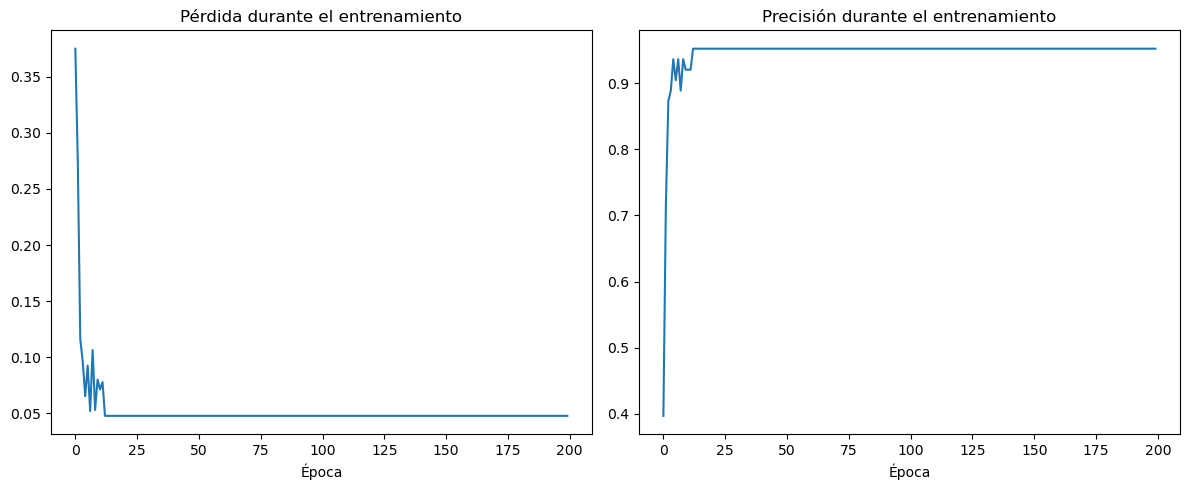

In [9]:
# 4. Entrenamiento
print("\n=== ENTRENAMIENTO ===")
input_size = 800 * 600  # 480,000 características
red = RedNeuronal(input_size, hidden_size=128)

red.train(X, y, epochs=200, lr=0.001)

# Gráficos de entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(red.loss_history)
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Época")

plt.subplot(1, 2, 2)
plt.plot(red.acc_history)
plt.title("Precisión durante el entrenamiento")
plt.xlabel("Época")
plt.tight_layout()
plt.show()


In [11]:

# 5. Función de predicción
def predecir_imagen(modelo, imagen_path, target_size=(800, 600)):
    """Predice si una imagen es 'Axell' o 'otro'"""
    try:
        # Carga y preprocesamiento idéntico al entrenamiento
        img = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError("No se pudo leer la imagen")
            
        img = cv2.resize(img, target_size)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img = clahe.apply(img)
        img = (img - img.mean()) / (img.std() + 1e-8)
        
        # Predicción
        prob = modelo.forward(img.flatten().reshape(1, -1))[0][0]
        resultado = "Axell" if prob > 0.5 else "OTRO"
        
        # Visualización
        plt.figure(figsize=(8, 6))
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicción: {resultado}\nConfianza: {prob*100:.1f}%")
        plt.axis('off')
        plt.show()
        
        return prob
        
    except Exception as e:
        print(f" Error en {imagen_path}: {str(e)}")
        return None



=== PRUEBAS DEL MODELO ===
1. Probando con imagen mia:


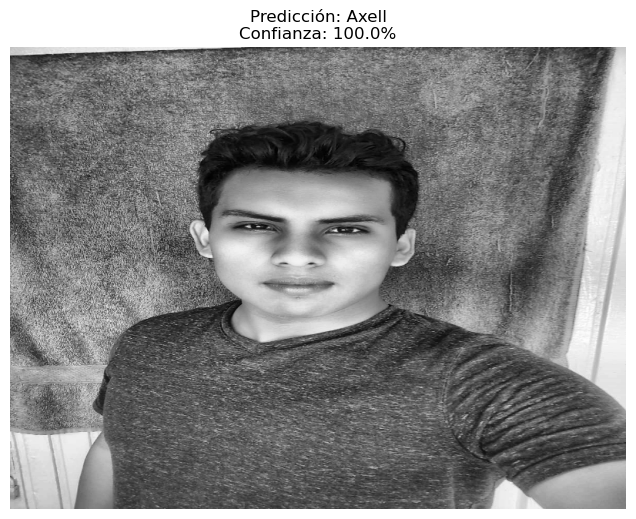


2. Probando con imagen ajena:


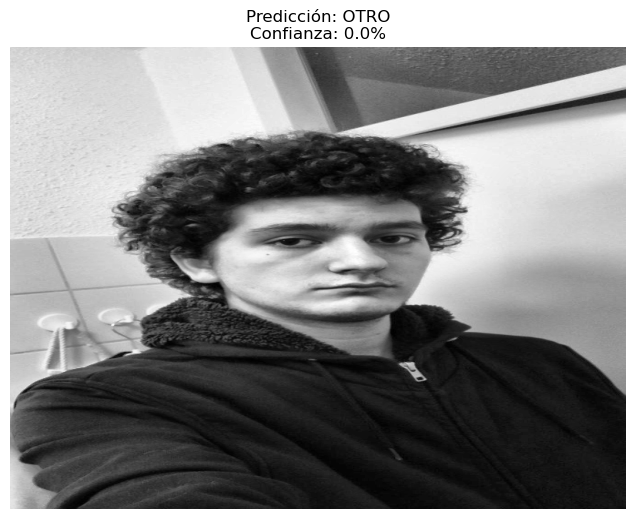

8.107837694949066e-05

In [47]:

# 6. Pruebas del modelo
print("\n=== PRUEBAS DEL MODELO ===")
print("1. Probando con imagen mia:")
predecir_imagen(red, "dataset/mi_rostro/yo31.jpg")

print("\n2. Probando con imagen ajena:")
predecir_imagen(red, "dataset/otros_rostros/no18.jpg")
